#Домашняя работа на 2 ноября 2024 г.
#Устинов Александр, 3824М1ПМвм

##Постановка задачи

Даны результаты опроса, который проводит авиакомпания среди своих клиентов. Опрос включает в себя персональные данные клиента, сведения о рейсе, оценку различных факторов обслуживания и общую удовлетворённость полётом. На основании ответов клиента требуется определить, удовлетворён он полётом или нет.

Классов всего два: "доволен" и "нейтрален или недоволен".

Подключение библиотек:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Чтение данных:

In [42]:
train_raw = pd.read_csv('drive/MyDrive/ML-master/train.csv')
test_raw = pd.read_csv('drive/MyDrive/ML-master/test.csv')

In [43]:
train_raw

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [44]:
test_raw

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Удалим столбцы `Unnamed: 0` и `id`, не имеющие содержательного смысла для данной задачи:

In [45]:
train_raw = train_raw.drop(['Unnamed: 0', 'id'], axis=1)
test_raw = test_raw.drop(['Unnamed: 0', 'id'], axis=1)

In [46]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [47]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [48]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

Объединим `train_raw` и `test_raw`, чтобы не дублировать предобработку данных и иметь возможность самостоятельно разделять данные на выборки:

In [49]:
data_raw = pd.concat([train_raw, test_raw], ignore_index=True)

In [50]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

Преобразуем текстовые признаки в категориальные:

In [51]:
for column in data_raw.select_dtypes(include=['object']):
  data_raw[column] = data_raw[column].astype('category')

In [52]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  int64   
 7   Departure/Arrival time convenient  129880 non-null  int64   
 8   Ease of Online booking             129880 non-null  int64   
 9   Gate location                      129880 non-null  int64   
 10  Food and drink                     129880 non-null  int64   
 11  Online boarding           

Числовые характеристики:

In [53]:
data_raw.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


Классы примерно сбалансированы: 44,4% людей довольны, 56,6% нейтральны или недовольны. 69% совершают деловые поездки. 48% выбирают бизнес-класс.

In [54]:
data_raw.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Большинство опрошенных имеют возраст от 25 до 55 лет. Расстояние полёта в большинстве случаев находится в пределах от 200 до 2200 километров. Задержка посадки и прибытия в пункт назначения имеют место в менее чем половине случаев, в конкретных ситуациях оказывается больше суток.

<Axes: >

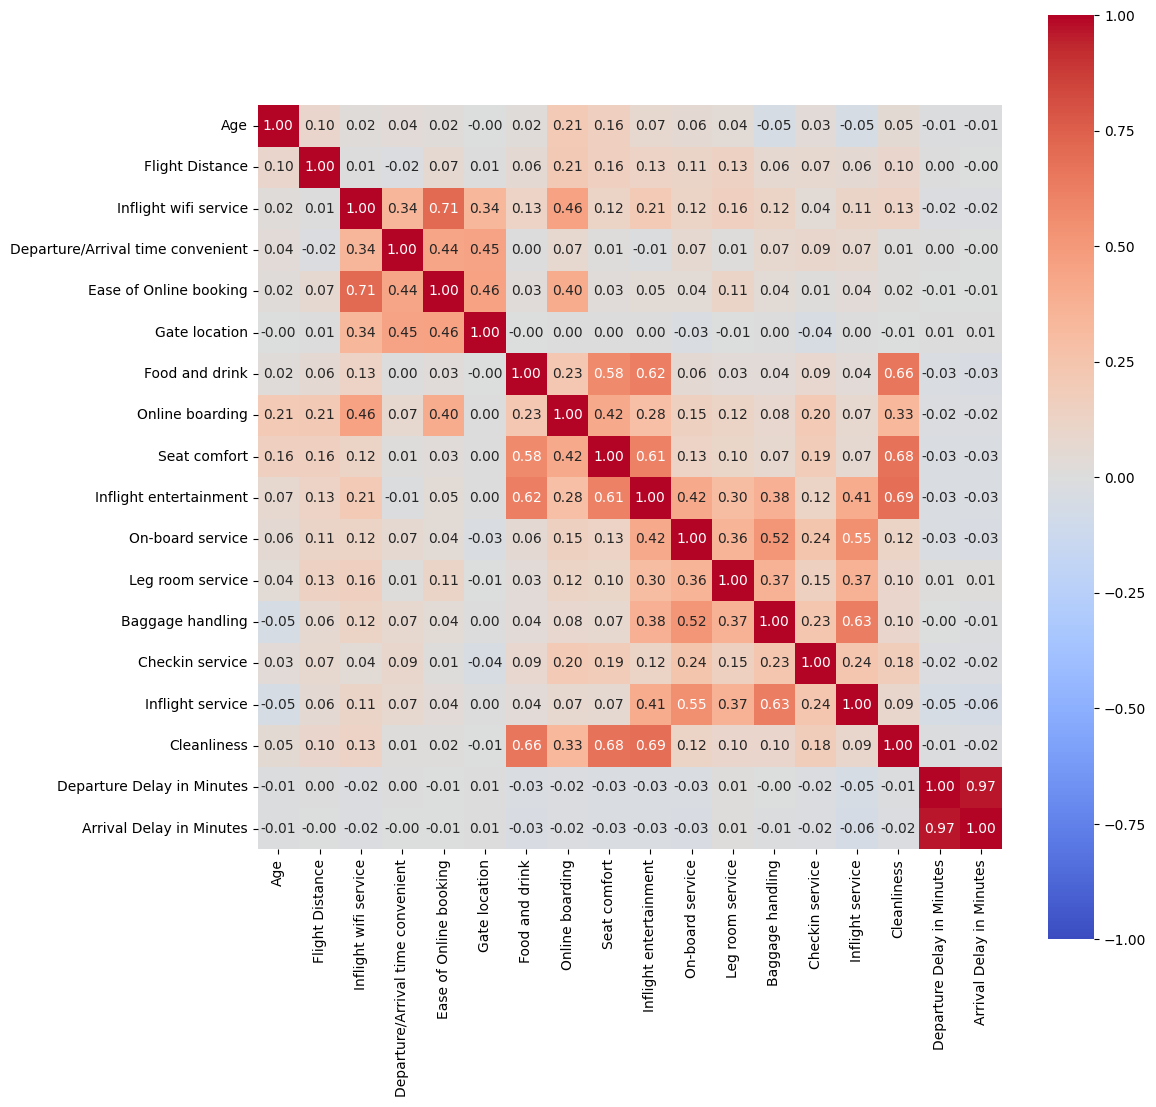

In [55]:
data_corr = data_raw.corr(numeric_only=True)
plt.figure(figsize = (12,12))
sns.heatmap(data_corr, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Налицо линейная зависимость между задержкой посадки и задержкой прибытия, что логично. Значит, можно исключить один из двух признаков.

Существенна корреляция между парами следующих признаков: чистота в салоне, еда и напитки, удобство сидений, развлечения во время полёта. Можно объяснить это тем, что данные признаки одинаково хороши или плохи для конкретного класса обслуживания.

Также люботытна корреляция между простотой онлайн-покупки билетов и наличием Wi-Fi на борту самолёта. Естественное объяснение этому найти сложно.

Проверим наличие пропущенных значений:

In [56]:
data_raw.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


Пропуски есть в задержке прибытия в пункт назначения. Ранее было замечено, что этот признак сильно коррелирует с задержкой посадки в самолёт, поэтому, исключая данный признак, мы избавимся от пропущенных значений.

In [57]:
data = data_raw.drop(['Arrival Delay in Minutes'], axis=1)

Выделим метки в отдельный столбец:

In [58]:
y = data['satisfaction']
data = data.drop(['satisfaction'], axis=1)
y = (y == 'satisfied')

Применим one-hot-encoding к категориальным признакам для их бинаризации:

In [59]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
category_columns = data.select_dtypes(include=['category'])
enc.fit(category_columns)
one_hot_columns = pd.DataFrame(enc.transform(category_columns),
                               columns=enc.get_feature_names_out(), index=data.index)
data = pd.concat([data, one_hot_columns], axis=1).drop(category_columns, axis=1)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  int64  
 1   Flight Distance                    129880 non-null  int64  
 2   Inflight wifi service              129880 non-null  int64  
 3   Departure/Arrival time convenient  129880 non-null  int64  
 4   Ease of Online booking             129880 non-null  int64  
 5   Gate location                      129880 non-null  int64  
 6   Food and drink                     129880 non-null  int64  
 7   Online boarding                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Inflight entertainment             129880 non-null  int64  
 10  On-board service                   129880 non-null  int64  
 11  Leg room service                   1298

Нормализуем признаки, чтобы улучшить работу некоторых методов машинного обучения. Это может быть полезно, например, для метода $k$ ближайших соседей.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,...,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05
mean,-8.985729e-17,8.944698e-17,-1.422398e-18,5.530942e-17,-1.395592e-16,-1.150502e-16,5.503588e-17,1.403798e-16,1.969475e-18,2.188305e-18,...,-1.333772e-16,1.158571e-16,4.792389e-17,1.488048e-17,-1.849118e-17,5.733360e-17,4.310961e-17,-3.419227e-17,-4.907275e-17,9.902082e-18
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.144805e+00,-1.162282e+00,-2.052677e+00,-2.002704e+00,-1.966761e+00,-2.328424e+00,-2.409735e+00,-2.408085e+00,-2.608507e+00,-2.517216e+00,...,-2.611213e+00,-3.095354e+00,-2.501624e+00,-3.864811e-01,-9.853400e-01,-4.734218e-01,-6.693658e-01,-9.580695e-01,-9.026082e-01,-2.794990e-01
25%,-8.219928e-01,-7.783021e-01,-5.481656e-01,-6.927194e-01,-5.399566e-01,-7.641092e-01,-9.058939e-01,-9.273863e-01,-1.092533e+00,-1.018015e+00,...,-2.418828e-01,-5.457739e-01,-9.791796e-01,-3.864811e-01,-9.853400e-01,-4.734218e-01,-6.693658e-01,-9.580695e-01,-9.026082e-01,-2.794990e-01
50%,3.783531e-02,-3.472022e-01,2.040902e-01,-3.772711e-02,1.734455e-01,1.804840e-02,-1.539735e-01,-1.870368e-01,4.234409e-01,4.811861e-01,...,-2.418828e-01,3.040860e-01,-2.179575e-01,-3.864811e-01,-9.853400e-01,-4.734218e-01,-6.693658e-01,-9.580695e-01,-9.026082e-01,-2.794990e-01
75%,7.653821e-01,5.550999e-01,9.563460e-01,6.172651e-01,8.868475e-01,8.002060e-01,5.979470e-01,5.533126e-01,1.181428e+00,4.811861e-01,...,5.478940e-01,1.153946e+00,5.432645e-01,-7.128035e-02,1.014878e+00,-4.734218e-01,1.493951e+00,1.043766e+00,1.107900e+00,-2.794990e-01
max,3.014163e+00,3.802385e+00,1.708602e+00,1.272257e+00,1.600249e+00,1.582364e+00,1.349867e+00,1.293662e+00,1.181428e+00,1.230787e+00,...,1.337671e+00,1.153946e+00,1.304487e+00,4.143015e+01,1.014878e+00,2.112281e+00,1.493951e+00,1.043766e+00,1.107900e+00,3.577831e+00


Наконец, разделим выборку на тренировочную и тестовую выборки:

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20, random_state = 42069)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(103904, 25976)

##Применение методов машинного обучения

Начнём с метода $k$ ближайших соседей. Сначала рассмотрим $k = 1$:

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, p=2)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
print('Train error: ', (y_train != y_train_prediction).mean())
print('Test error:  ', (y_test != y_test_prediction).mean())


Train error:  0.0
Test error:  0.0850015398829689


На тренировочной выборке ошибка отсутствует, что неудивительно при $k = 1$, на тестовой выборке ошибка составляет 8,5%.

Теперь переберём значения $k$ от 1 до 16 и построим графики доли ошибок на тренировочной и тестовой выборках:

In [67]:
train_error = []
test_error = []

for k in range(1,17):
  model = KNeighborsClassifier(n_neighbors=k, p=2)
  model.fit(X_train, y_train)
  y_train_prediction = model.predict(X_train)
  y_test_prediction = model.predict(X_test)
  train_error.append((y_train != y_train_prediction).mean())
  test_error.append((y_test != y_test_prediction).mean())

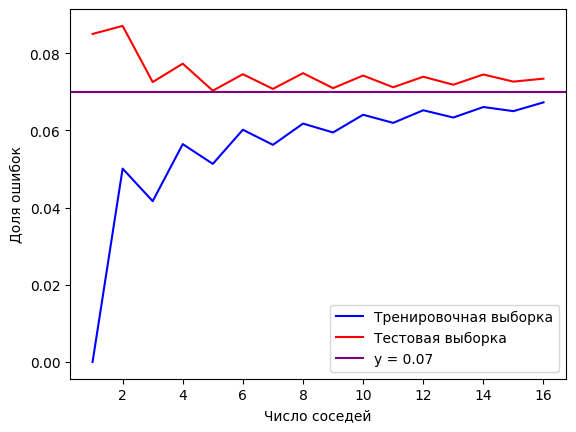

In [80]:
plt.plot([k for k in range(1,17)], train_error, color='b', label='Тренировочная выборка')
plt.plot([k for k in range(1,17)], test_error, color='r', label='Тестовая выборка')
plt.axhline(y=0.07, color='purple', label='y = 0.07')
plt.legend(loc='lower right')
plt.xlabel('Число соседей')
plt.ylabel('Доля ошибок')
plt.show()
pass

Любопытно, что значения ошибок меняются скачками при смене чётности $k$, причём для нечётных $k$ доля ошибок меньше, чем для чётных. Возможно, это вызвано специфичным расположением точек в пространстве признаков.

По графику можно сделать вывод, что минимальная ошибка на тестовой выборке достигается при $k = 5$ и составляет примерно 7%.
При $k < 5$ ошибка на тестовой выборке убывает, на тренировочной выборке - возрастает. При этом модель можно считать переобученной - она слишком хорошо приспособлена к тренировочным данным, но на произвольных данных показывает большую ошибку. При $k > 5$ ошибки на обеих выборках возрастают. Можно предположить, что и для больших $k$ ошибка продолжит расти. Модель при этом будет недообученной.

Запустим метод ближайших соседей с оптимальным значением $k$ и посмотрим на более точные значения ошибок:

In [81]:
k_optimal = 5
model = KNeighborsClassifier(n_neighbors=k_optimal, p=2)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
print('Train error: ', (y_train != y_train_prediction).mean())
print('Test error:  ', (y_test != y_test_prediction).mean())

Train error:  0.05132622420696027
Test error:   0.07029565753002771


Ошибка на тренировочной выборке составляет 5,1%, на тестовой выборке - 7%.

Попробуем также классификатор `RandomForest`. Он может показать хорошие результаты в задачах с категориальными признаками.

Для начала зададим число деревьев решений равным 100:

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
print('Train error: ', (y_train != y_train_prediction).mean())
print('Test error:  ', (y_test != y_test_prediction).mean())

Train error:  9.624268555589775e-06
Test error:   0.035840776101016325


На тренировочной выборке ошибка крайне мала - 0,00096%, а на тестовой выборке составляет 3,6%. Этот результат заметно лучше, чем у метода $k$ ближайших соседей, и это даже без подбора оптимальных параметров.

Теперь подберём оптимальное число деревьев решений, перебрав значения в небольшом промежутке и построив график зависимости ошибок от параметра:

In [85]:
train_error = []
test_error = []
n_trees_range = range(10, 201, 10)
for n_trees in n_trees_range:
  model = RandomForestClassifier(n_estimators=n_trees)
  model.fit(X_train, y_train)
  y_train_prediction = model.predict(X_train)
  y_test_prediction = model.predict(X_test)
  train_error.append((y_train != y_train_prediction).mean())
  test_error.append((y_test != y_test_prediction).mean())



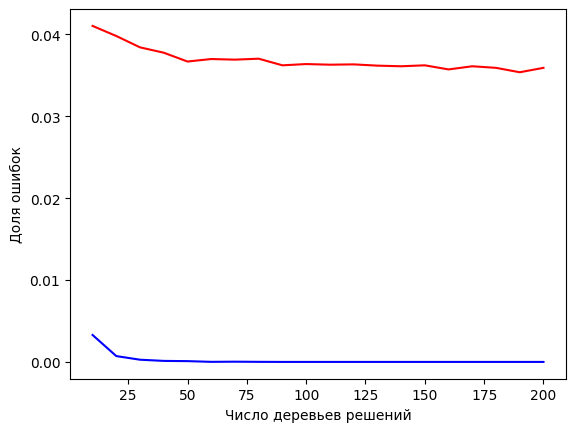

In [86]:
plt.plot(n_trees_range, train_error, color='b', label='Тренировочная выборка')
plt.plot(n_trees_range, test_error, color='r', label='Тестовая выборка')
#plt.legend(loc='lower right')
plt.xlabel('Число деревьев решений')
plt.ylabel('Доля ошибок')
plt.show()
pass

На тренировочной выборке (синий график) ошибка устремляется к нулю с ростом параметра. Возможно, это ситуация переобучения, однако на тестовой выборке (красный график) ошибка также убывает. Неочевидно, в какой момент ошибка начнёт расти.

Чтобы предсказать дальнейшую тенденцию изменения ошибки, переберём ещё несколько значений, но большим шагом.

In [87]:
train_error = []
test_error = []
n_trees_range = [300, 400, 500, 600]
for n_trees in n_trees_range:
  model = RandomForestClassifier(n_estimators=n_trees)
  model.fit(X_train, y_train)
  y_train_prediction = model.predict(X_train)
  y_test_prediction = model.predict(X_test)
  train_error.append((y_train != y_train_prediction).mean())
  test_error.append((y_test != y_test_prediction).mean())

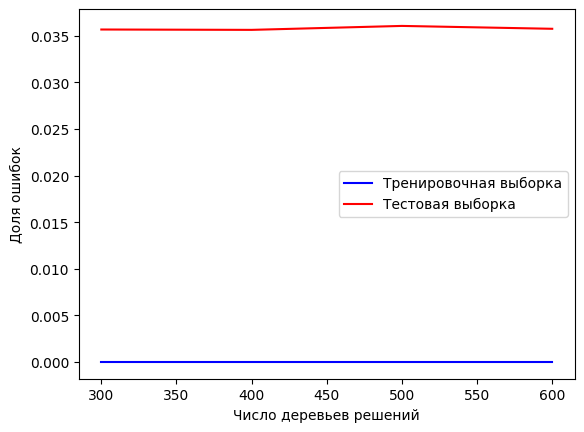

In [89]:
plt.plot(n_trees_range, train_error, color='b', label='Тренировочная выборка')
plt.plot(n_trees_range, test_error, color='r', label='Тестовая выборка')
plt.legend(loc='center right')
plt.xlabel('Число деревьев решений')
plt.ylabel('Доля ошибок')
plt.show()
pass

Заметных улучшений нет. Кроме того, с ростом числа деревьев прямо пропорционально растёт время работы классификатора, поэтому использовать такое большое значение параметра нецелесообразно. Остановимся на числе деревьев, равном 190:

In [92]:
n_trees_optimal = 190
model = RandomForestClassifier(n_estimators=n_trees_optimal)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
print('Train error: ', (y_train != y_train_prediction).mean())
print('Test error:  ', (y_test != y_test_prediction).mean())

Train error:  0.0
Test error:   0.03603326147212812


Результат оказался не лучше, чем при 100 деревьях. Значит, в данном случае мы рассмотрели в самом начале оптимальное значение параметра.

##Общие выводы

1. В датасете есть признаки с коэффициентом корреляции, очень близким к 1 (время задержки рейса и время прибытия), и признаки с коэффициентом корреляции в промежутке от 0,6 до 0,7. Для признаков из первой группы, ввиду их очевидной взаимосвязи, было решено оставить только время задержки рейса. Признаки из второй группы были оставлены все.
2. В методе $k$ ближайших соседей оптимальное значение параметра есть $k = 5$, при этом ошибка на тренировочной выборке составляет 5,1%, на тестовой выборке - 7%. При меньших $k$ модель переобучается, при больших $k$ - недообучается.
3. Случайный лес оказался оптимальным с точки зрения accuracy при числе деревьев решений, равном 100. Ошибка на тренировочной выборе оказалась 0,001%, на тестовой выборке - 3,5%, что вдвое меньше, чем с методом $k$ ближайших соседей.